In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = 'suicidios.csv'
df = pd.read_csv(filename)

In [3]:
df.rename(
    columns = {
        'country': 'pais',
        'year': 'ano',
        'sex': 'sexo',
        'age': 'idade',
        'suicides_no': 'suicidios',
        'population': 'populacao',
        'suicides/100k pop': 'suicidios_100k',
        'HDI for year': 'idh_ano',
        'gdp_for_year ($)': 'pib_ano',
        'gdp_per_capita ($)': 'pib',
        'generation': 'geracao'
    }, 
    inplace=True
)

In [4]:
df.shape

(27820, 12)

In [5]:
pd.options.display.max_rows = 999
df.head(1)

,pais,ano,sexo,idade,suicidios,populacao,suicidios_100k,country-year,idh_ano,gdp_for_year ($),pib,geracao
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X


In [6]:
df.describe()

,ano,suicidios,populacao,suicidios_100k,idh_ano,pib
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


# Total de Suicídios por Ano

     ano  sexo  suicidios  porcentagem
31  2000  male     200578         2.97
35  2002  male     200546         2.97
37  2003  male     200452         2.97
29  1999  male     199904         2.96
33  2001  male     197653         2.93


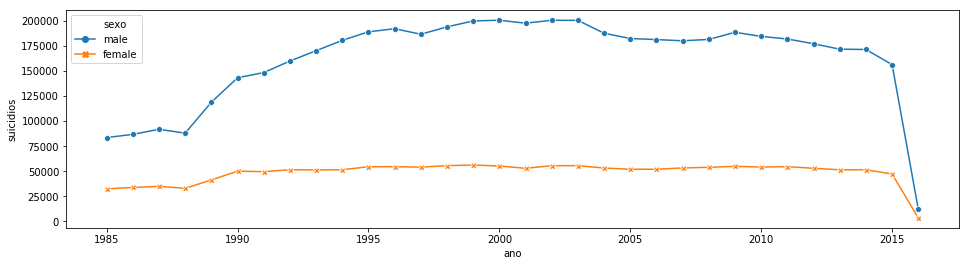

In [7]:
year = df['suicidios'].groupby([df['ano'], df['sexo']]).agg({'suicidios':sum}).assign(porcentagem = lambda x: 100 * x/x.sum())
year = np.round(year, decimals=2)
year = year.reset_index().sort_values(by='suicidios', ascending=False)
most_year = year
print(most_year.head(5))
fig = plt.figure(figsize=(16,4))
ax = sns.lineplot(x="ano", y="suicidios",
hue="sexo", style="sexo",
markers=True, dashes=False, data=most_year)

# Total de Suicídios por Gênero

Total de Suicidios por Gênero entre 1985 - 2016

     sexo  suicidios  porcentagem
1    male    5188910         77.0
0  female    1559510         23.0


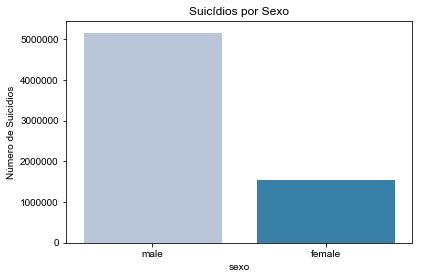

In [8]:
suic_sex = df['suicidios'].groupby(df['sexo']).agg({'suicidios' : 'sum'}).assign(porcentagem = lambda x: 100 * x/x.sum())
suic_sex = np.round(suic_sex, decimals=0)
suic_sex = suic_sex.reset_index().sort_values(by='suicidios',ascending=False)
most_sex = suic_sex
print("Total de Suicidios por Gênero entre 1985 - 2016")
print()
print(most_sex)
fig = plt.figure(figsize=(6,4))
plt.title('Suicídios por Sexo')
sns.set(font_scale=0.9)
sns.barplot(y='suicidios',x='sexo',data=most_sex,palette="PuBu");
plt.ylabel('Número de Suicídios')
plt.tight_layout()

# Total de Suicídios por Idade

Total de Suicidios por Idade entre 1985 - 2016

         idade  suicidios  porcentagem
2  35-54 years    2452141         36.0
4  55-74 years    1658443         25.0
1  25-34 years    1123912         17.0
0  15-24 years     808542         12.0
5    75+ years     653118         10.0
3   5-14 years      52264          1.0


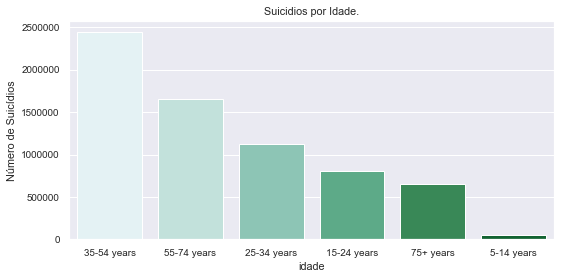

In [9]:
suic_age = df['suicidios'].groupby(df['idade']).agg({'suicidios' : 'sum'}).assign(porcentagem = lambda x: 100 * x/x.sum())
suic_age = np.round(suic_age, decimals=0)
suic_age = suic_age.reset_index().sort_values(by='suicidios',ascending=False)
most_age = suic_age
print("Total de Suicidios por Idade entre 1985 - 2016")
print()
print(most_age)
fig = plt.figure(figsize=(8,4))
plt.title('Suicidios por Idade.')
sns.set(font_scale=0.9)
sns.barplot(y='suicidios',x='idade',data=most_age,palette="BuGn");
plt.ylabel('Número de Suicídios')
plt.tight_layout()

# Total de Suicídios por Sexo e Idade

Total de Suicidios por Idade e Sexo entre 1985 - 2016

      sexo        idade  suicidios  porcentagem
8     male  35-54 years    1945908         29.0
10    male  55-74 years    1228407         18.0
7     male  25-34 years     915089         14.0
6     male  15-24 years     633105          9.0
2   female  35-54 years     506233          8.0
11    male    75+ years     431134          6.0
4   female  55-74 years     430036          6.0
5   female    75+ years     221984          3.0
1   female  25-34 years     208823          3.0
0   female  15-24 years     175437          3.0
9     male   5-14 years      35267          1.0
3   female   5-14 years      16997          0.0


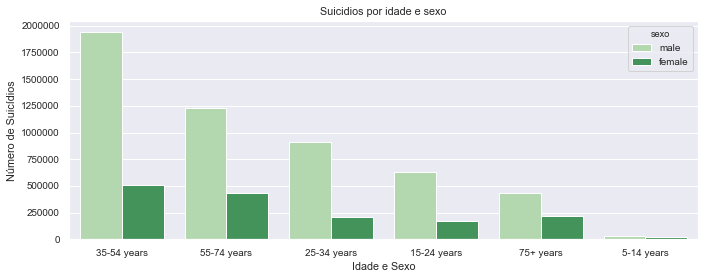

In [10]:
by_age_s = df['suicidios'].groupby([df['sexo'], df['idade']]).agg({'suicidios':sum}).assign(porcentagem = lambda x: 100 * x/x.sum())
by_age_s = np.round(by_age_s, decimals=0)
by_age_s = by_age_s.reset_index().sort_values(by='suicidios', ascending=False)
most_age_s = by_age_s
print("Total de Suicidios por Idade e Sexo entre 1985 - 2016")
print()
print(most_age_s)
fig = plt.figure(figsize=(10,4))
plt.title('Suicidios por idade e sexo')
sns.set(font_scale=0.9)
sns.barplot(y='suicidios',x='idade',hue='sexo',data=most_age_s,palette='Greens');
plt.xlabel('Idade e Sexo')
plt.ylabel('Número de Suicídios')
plt.tight_layout()

# Total de Suicídios entre Países 

Total de Suicídio entre Países no ano de 1985-2016

                  pais  suicidios  porcentagem
75  Russian Federation    1209742         18.0
98       United States    1034013         15.0
46               Japan     806902         12.0
33              France     329127          5.0
95             Ukraine     319950          5.0
35             Germany     291262          4.0
73   Republic of Korea     261730          4.0
15              Brazil     226613          3.0
69              Poland     139098          2.0
97      United Kingdom     136805          2.0
44               Italy     132060          2.0
58              Mexico     111139          2.0
91            Thailand     110643          2.0
18              Canada     107561          2.0
47          Kazakhstan     101546          2.0


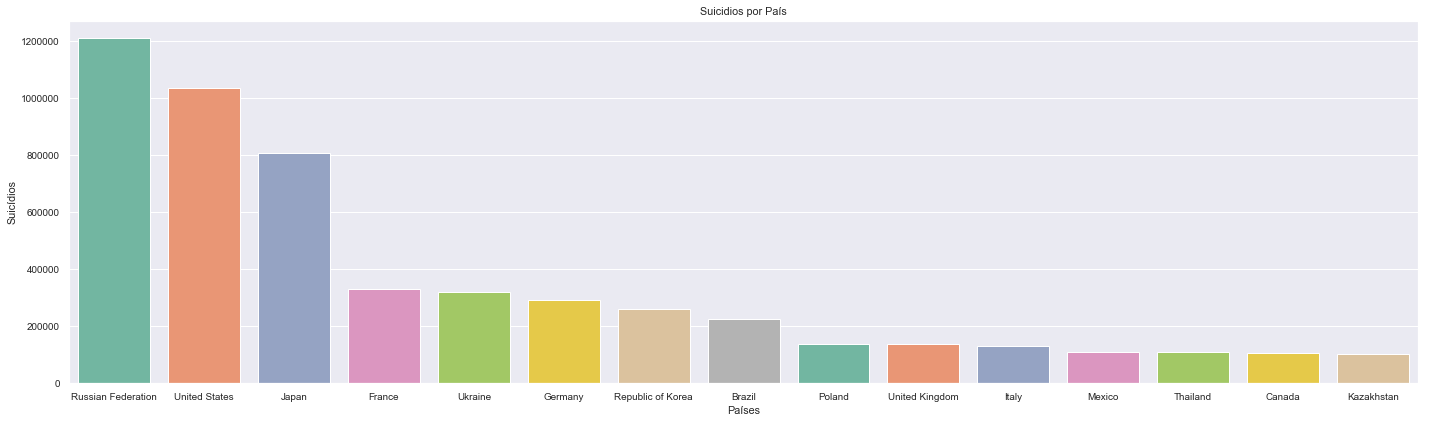

In [13]:
by_country = df['suicidios'].groupby([df['pais']]).agg({'suicidios':'sum'}).assign(porcentagem = lambda x: 100 * x/x.sum())
by_country = np.round(by_country, decimals=0)
by_country = by_country.reset_index().sort_values(by='suicidios', ascending=False)
most_country = by_country.head(15)
print("Total de Suicídio entre Países no ano de 1985-2016")
print()
print(most_country.head(15))
fig = plt.figure(figsize=(20,6))
plt.title('Suicidios por País')
sns.set(font_scale=0.9)
sns.barplot(y='suicidios',x='pais',data=most_country,palette='Set2');
plt.xlabel('Países')
plt.ylabel('Suicídios')
plt.tight_layout()